<a href="https://colab.research.google.com/github/HiimanshuSherawat/Churn_Modelling_Deep_Learning/blob/main/Churn_Modelling_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 497.5 MB 25 kB/s 
     |████████████████████████████████| 462 kB 45.5 MB/s 


In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.8.0


In [4]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# Importing the dataset
dataset = pd.read_csv('/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [8]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [9]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
## Lets make model via ANN

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [13]:
# Initialising the ANN
classifier = Sequential()

In [16]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=11,activation='relu'))

In [17]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [18]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=1,activation='relu'))

In [19]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/50
536/536 [==============================] - 7s 7ms/step - loss: 0.8238 - accuracy: 0.7300 - val_loss: 0.5572 - val_accuracy: 0.7770
Epoch 2/50
536/536 [==============================] - 3s 6ms/step - loss: 0.5075 - accuracy: 0.7839 - val_loss: 0.4982 - val_accuracy: 0.7834
Epoch 3/50
536/536 [==============================] - 3s 5ms/step - loss: 0.4723 - accuracy: 0.7942 - val_loss: 0.4735 - val_accuracy: 0.7952
Epoch 4/50
536/536 [==============================] - 3s 5ms/step - loss: 0.4437 - accuracy: 0.8095 - val_loss: 0.4468 - val_accuracy: 0.8095
Epoch 5/50
536/536 [==============================] - 3s 5ms/step - loss: 0.4209 - accuracy: 0.8203 - val_loss: 0.4308 - val_accuracy: 0.8160
Epoch 6/50
536/536 [==============================] - 3s 5ms/step - loss: 0.4010 - accuracy: 0.8309 - val_loss: 0.4180 - val_accuracy: 0.8289
Epoch 7/50
536/536 [==============================] - 3s 5ms/step - loss: 0.4045 - accuracy: 0.8326 - val_loss: 0.4087 - val_accuracy: 0.8270
Epoch 

In [21]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


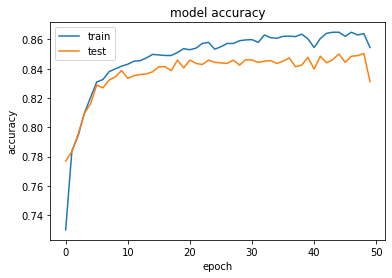

In [22]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

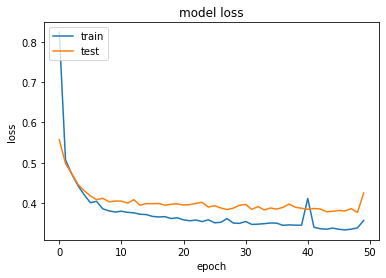

In [23]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [25]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1562,   33],
       [ 282,  123]])

In [26]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [27]:
score

0.8425